# Lab 3: Clustering

Clustering In Practice

1. Pre-process the data

    - Normalize data when necessary

    - Choose appropriate distance metric

2. Implement clustering method
    - Depending on the method, this may require specifying the number of clusters

3. Interpret the results

    - Examine the dendrogram if using hierarchical clustering or cluster centroids

    - Evaluate whether the results make sense: remember, good clusters may actually not exist for all data!

    - If needed, re-run the clustering analysis fine-tuning your parameters (number of clusters, distance metric, etc..)'

# Pre-requisite

Install in Anaconda or via R: 
- `fviz_cluster`
- `factoextra`
- `plyr`
- `gridExtra`
    
# Overview

Dataset: United States attributes by states
Objective: create clusters of states, based on the available attributes
    
## Preprocessing

In [1]:
# install.packages("factoextra") # install in Anaconda if this fails
#Load the package stats
library(stats)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
#Load the data from the US_stats file
data_states <- read.csv("US_States_2014.csv")

In [3]:
#Explore the data to get a sense of the attributes
head(data_states, n = 3)

,State,Female_Population,Male_Population,Male_MedianAge,Female_MedianAge,Unemployment_Rate,Robbery,Burglary,Larceny.theft,Motor.vehicle.theft,Region
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,Alabama,2499410,2349967,37.1,40.0,6.8,4701,39715,104238,10141,South
2,Alaska,349436,387296,32.7,34.0,6.9,629,3150,15445,1739,West
3,Arizona,3387637,3343847,35.8,38.4,6.8,6249,43562,154091,17587,West


In [4]:
#get a summary, pay attention to the data range (min and max)
summary(data_states)

    State           Female_Population  Male_Population    Male_MedianAge 
 Length:51          Min.   :  286111   Min.   :  298042   Min.   :30.00  
 Class :character   1st Qu.:  876190   1st Qu.:  866206   1st Qu.:35.35  
 Mode  :character   Median : 2240299   Median : 2173158   Median :36.70  
                    Mean   : 3174913   Mean   : 3077186   Mean   :36.73  
                    3rd Qu.: 3503090   3rd Qu.: 3436891   3rd Qu.:37.95  
                    Max.   :19533596   Max.   :19268904   Max.   :43.00  
 Female_MedianAge Unemployment_Rate    Robbery         Burglary     
 Min.   :31.00    Min.   :2.700     Min.   :   70   Min.   :  2034  
 1st Qu.:37.60    1st Qu.:4.750     1st Qu.: 1188   1st Qu.:  8462  
 Median :39.50    Median :6.000     Median : 3497   Median : 23244  
 Mean   :39.25    Mean   :5.782     Mean   : 6420   Mean   : 34065  
 3rd Qu.:40.80    3rd Qu.:6.750     3rd Qu.: 7081   3rd Qu.: 41638  
 Max.   :45.30    Max.   :7.900     Max.   :48680   Max.   :202670  

Now we have dimensions of all ranges, what do we do?

## Typical Process

Data Preparation

- Objective: create clusters of states, based on the available attributes

- We need to decide whether there is the need to normalize the data. In most cases, normalization is necessary. You can look at the summary of your data, to get a sense, for example, of the ranges of your attributes.

- If we conclude that we need to normalize the data, we need to:

- Assess which attributes to normalize.
    - In our case, the column State contains the name of each State; it is not an attribute we will use for clustering.
    - As such, we exclude it from the normalization.
    - The attribute Region is also categorical. Since the variable Region already “groups” states into regions, we can argue that it would not add much to the cluster analysis, therefore we can decide to exclude it.
    - You need to provide reasonings for including or excluding attributes. 

- Decide which method to use to normalize the data; we have seen two, min-max normalization and standardization

### Min-max Normalization

This is really easy, we can quickly implement a custom R function to achieve this.

Operating on a vector:

In [5]:
p <- c(1, 2, 3, 4)

In [6]:
min(p)

[1] 1

In [7]:
p - min(p)

[1] 0 1 2 3

Defining a function

In [8]:
normalize <- function(x) { # x is a vector
  return ((x - min(x)) / (max(x) - min(x)))
}

In [9]:
normalize(p)

[1] 0.0000000 0.3333333 0.6666667 1.0000000

Now all the data points will fall in the range between 0 and 1. Let's try another one:

In [10]:
normalize(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100))
# Let's say 1000 is an outlier, it's supposed to be 10

[1] 0.00000000 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 [7] 0.06060606 0.07070707 0.08080808 0.09090909 1.00000000

In [11]:
normalize(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# Let's say we do not have an outlier

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000

### Standardization

In [12]:
# install.packages("standardize") # install in Anaconda if this fails
library(standardize) # remember that you need to load the library after installation, and anytime you reopen your notebook

Remember standardization will transform your attributes to have mean = 0 and standard deviation = 1

In [13]:
s <- scale(p)
s

-1.1618950
-0.3872983
0.3872983
1.1618950


Now, the standardization will transform the column (or array, or a list of number) such that it has a mean of 0, and a standard deviation of 1.

In [14]:
mean(s)

[1] 0

In [15]:
sd(s)

[1] 1

How does it handle the outliers?

In [16]:
scale(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

-1.4863011
-1.1560120
-0.8257228
-0.4954337
-0.1651446
0.1651446
0.4954337
0.8257228
1.1560120
1.4863011


In [17]:
scale(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100))

# although it is still affected by the outlier, the impact is much smaller than min-max

-0.4571290
-0.4222095
-0.3872899
-0.3523703
-0.3174507
-0.2825311
-0.2476116
-0.2126920
-0.1777724
-0.1428528
2.9999093


### Performing Normalization on Real Dataset

Let's take a look at the original data first.

In [18]:
head(data_states)

,State,Female_Population,Male_Population,Male_MedianAge,Female_MedianAge,Unemployment_Rate,Robbery,Burglary,Larceny.theft,Motor.vehicle.theft,Region
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,Alabama,2499410,2349967,37.1,40.0,6.8,4701,39715,104238,10141,South
2,Alaska,349436,387296,32.7,34.0,6.9,629,3150,15445,1739,West
3,Arizona,3387637,3343847,35.8,38.4,6.8,6249,43562,154091,17587,West
4,Arkansas,1509053,1457316,36.5,39.2,6.0,2050,24790,68627,5601,South
5,California,19533596,19268904,34.9,37.2,7.5,48680,202670,592670,151852,West
6,Colorado,2664707,2691159,35.5,37.5,5.0,3039,23472,99464,12574,West


In [19]:
summary(data_states)

    State           Female_Population  Male_Population    Male_MedianAge 
 Length:51          Min.   :  286111   Min.   :  298042   Min.   :30.00  
 Class :character   1st Qu.:  876190   1st Qu.:  866206   1st Qu.:35.35  
 Mode  :character   Median : 2240299   Median : 2173158   Median :36.70  
                    Mean   : 3174913   Mean   : 3077186   Mean   :36.73  
                    3rd Qu.: 3503090   3rd Qu.: 3436891   3rd Qu.:37.95  
                    Max.   :19533596   Max.   :19268904   Max.   :43.00  
 Female_MedianAge Unemployment_Rate    Robbery         Burglary     
 Min.   :31.00    Min.   :2.700     Min.   :   70   Min.   :  2034  
 1st Qu.:37.60    1st Qu.:4.750     1st Qu.: 1188   1st Qu.:  8462  
 Median :39.50    Median :6.000     Median : 3497   Median : 23244  
 Mean   :39.25    Mean   :5.782     Mean   : 6420   Mean   : 34065  
 3rd Qu.:40.80    3rd Qu.:6.750     3rd Qu.: 7081   3rd Qu.: 41638  
 Max.   :45.30    Max.   :7.900     Max.   :48680   Max.   :202670  

## Batch manipulating the items in the dataset

`apply(x, MARGIN =, FUN = )`:

 - x: data you want to manipulate
 - `MARGIN`: over rows (=1) or columns (=2)?
 - `FUN`: function that actually manipulate the data.
 
In this case, we want to manipulate by columns -- that is, for each _column_ (`MARGIN = 2`), we want to apply the `normalize` function.

In [20]:
data_norm <- data_states # let's make a copy

In [21]:
# recall that not all columns are numerical, we will take column 2 to column 10. Excluding "Region", etc.

data_norm[, 2:10] <- apply(data_norm[, 2:10], MARGIN = 2, FUN = normalize)

# for each row and each column, we replace the value with "normalize" function that we have just defined 

In [22]:
head(data_norm)

,State,Female_Population,Male_Population,Male_MedianAge,Female_MedianAge,Unemployment_Rate,Robbery,Burglary,Larceny.theft,Motor.vehicle.theft,Region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Alabama,0.11499160,0.108161927,0.5461538,0.6293706,0.7884615,0.09526846,0.187807771,0.17503931,0.06635174,South
2,Alaska,0.00329004,0.004704794,0.2076923,0.2097902,0.8076923,0.01149969,0.005562312,0.02506811,0.01099603,West
3,Arizona,0.16113929,0.160551745,0.4461538,0.5174825,0.7884615,0.12711376,0.206981798,0.25924093,0.11540894,West
4,Arkansas,0.06353776,0.061108135,0.5000000,0.5734266,0.6346154,0.04073236,0.113419327,0.11489240,0.03644042,South
5,California,1.00000000,1.000000000,0.3769231,0.4335664,0.9230769,1.00000000,1.000000000,1.00000000,1.00000000,West
6,Colorado,0.12357957,0.126146983,0.4230769,0.4545455,0.4423077,0.06107797,0.106850216,0.16697603,0.08238131,West


In [23]:
summary(data_norm)

    State           Female_Population Male_Population   Male_MedianAge  
 Length:51          Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 Class :character   1st Qu.:0.03066   1st Qu.:0.02995   1st Qu.:0.4115  
 Mode  :character   Median :0.10153   Median :0.09884   Median :0.5154  
                    Mean   :0.15009   Mean   :0.14650   Mean   :0.5173  
                    3rd Qu.:0.16714   3rd Qu.:0.16546   3rd Qu.:0.6115  
                    Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  
 Female_MedianAge Unemployment_Rate    Robbery          Burglary      
 Min.   :0.0000   Min.   :0.0000    Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.4615   1st Qu.:0.3942    1st Qu.:0.0230   1st Qu.:0.03204  
 Median :0.5944   Median :0.6346    Median :0.0705   Median :0.10571  
 Mean   :0.5766   Mean   :0.5928    Mean   :0.1306   Mean   :0.15965  
 3rd Qu.:0.6853   3rd Qu.:0.7788    3rd Qu.:0.1442   3rd Qu.:0.19739  
 Max.   :1.0000   Max.   :1.0000    Max.   :1.0000   Max.   :1.

Similarly, we can use standardization:

In [24]:
data_stand <- data_states
data_stand[, 2:10] <- apply(data_stand[, 2:10], MARGIN = 2, FUN = scale)

In [25]:
head(data_stand)

,State,Female_Population,Male_Population,Male_MedianAge,Female_MedianAge,Unemployment_Rate,Robbery,Burglary,Larceny.theft,Motor.vehicle.theft,Region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Alabama,-0.18721234,-0.20681371,0.1635252,0.28835481,0.7938065,-0.19233904,0.1395290,-0.08100461,-0.1468087,South
2,Alaska,-0.78306699,-0.76497741,-1.7576822,-2.00350420,0.8718106,-0.64786190,-0.7634177,-0.76823066,-0.5129714,West
3,Arizona,0.05895537,0.07583568,-0.4041042,-0.32280759,0.7938065,-0.01916876,0.2345280,0.30483977,0.1776910,West
4,Arkansas,-0.46168488,-0.46067459,-0.0984576,-0.01722639,0.1697736,-0.48889874,-0.2290332,-0.35662101,-0.3446638,South
5,California,4.53372797,4.60476019,-0.7970785,-0.78117939,1.3398353,4.72746449,4.1635871,3.69928429,6.0290155,West
6,Colorado,-0.14140110,-0.10978216,-0.5350956,-0.66658644,-0.6102674,-0.37826217,-0.2615803,-0.11795366,-0.0407776,West


In [26]:
summary(data_stand)

    State           Female_Population  Male_Population   Male_MedianAge    
 Length:51          Min.   :-0.80062   Min.   :-0.7904   Min.   :-2.93660  
 Class :character   1st Qu.:-0.63708   1st Qu.:-0.6288   1st Qu.:-0.60059  
 Mode  :character   Median :-0.25902   Median :-0.2571   Median :-0.01113  
                    Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
                    3rd Qu.: 0.09095   3rd Qu.: 0.1023   3rd Qu.: 0.53467  
                    Max.   : 4.53373   Max.   : 4.6048   Max.   : 2.73969  
 Female_MedianAge   Unemployment_Rate    Robbery           Burglary      
 Min.   :-3.14943   Min.   :-2.4044   Min.   :-0.7104   Min.   :-0.7910  
 1st Qu.:-0.62839   1st Qu.:-0.8053   1st Qu.:-0.5853   1st Qu.:-0.6323  
 Median : 0.09737   Median : 0.1698   Median :-0.3270   Median :-0.2672  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59394   3rd Qu.: 0.7548   3rd Qu.: 0.0739   3rd Qu.: 0.1870  
 Max.   : 2.31283   Max.

# Hierarchical Clustering

Remember, the first step is to get the distance matrix.

In [27]:
distance_matrix_norm <- dist(data_norm[, 2:10], method = "euclidean")

In [28]:
head(as.matrix(distance_matrix_norm)) # inspect the distance matrix

,1,2,3,4,5,6,7,8,9,10,⋯,42,43,44,45,46,47,48,49,50,51
1,0.0000000,0.6163932,0.1956311,0.2163568,2.166603,0.4171050,0.2708112,0.3666350,0.6013617,1.159038,⋯,0.7421563,0.1169588,1.5734326,1.0302383,0.7654148,0.3578271,0.2729628,0.4370944,0.2967857,0.6250141
2,0.6163932,0.0000000,0.5663818,0.5250195,2.443508,0.5540490,0.7567060,0.6880939,0.1969850,1.650546,⋯,0.7646480,0.6749238,1.8001565,0.6780492,1.1138223,0.6664352,0.6779921,0.8937813,0.7161373,0.6510629
3,0.1956311,0.5663818,0.0000000,0.3039755,2.039694,0.3884601,0.4513366,0.5156561,0.5553021,1.106303,⋯,0.7757964,0.1623959,1.4259641,0.9391179,0.9039879,0.3463764,0.1842039,0.6235012,0.3842839,0.6660991
4,0.2163568,0.5250195,0.3039755,0.0000000,2.300974,0.2648539,0.3077048,0.2417007,0.5713148,1.303549,⋯,0.5389101,0.2769773,1.6567923,0.8732536,0.6609866,0.2763917,0.3363192,0.4585588,0.2222332,0.4187786
5,2.1666032,2.4435081,2.0396937,2.3009738,0.000000,2.2317449,2.3407014,2.4596268,2.4021228,1.326075,⋯,2.5566973,2.0676600,0.9493124,2.4805138,2.6278430,2.1551470,1.9837269,2.4642710,2.2322429,2.5102395
6,0.4171050,0.5540490,0.3884601,0.2648539,2.231745,0.0000000,0.5321795,0.4255675,0.6556247,1.297155,⋯,0.4068215,0.4096333,1.5308864,0.6753294,0.7173041,0.1850607,0.3471187,0.6767961,0.2897273,0.3222255


In [29]:
ward <- hclust(distance_matrix_norm, method = "ward.D")

# "method" here is the inter-cluster distance used, e.g. single, complete, average.
# Here we introduce a new one called Ward distance
# then we can try different distances

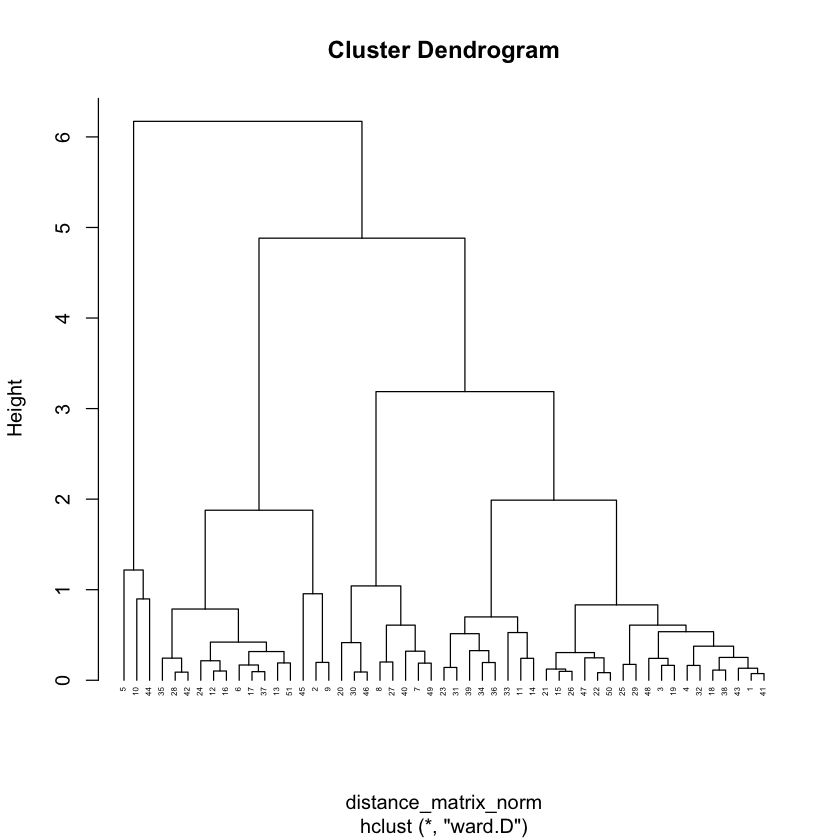

In [30]:
plot(ward, hang = -1, cex = 0.4)

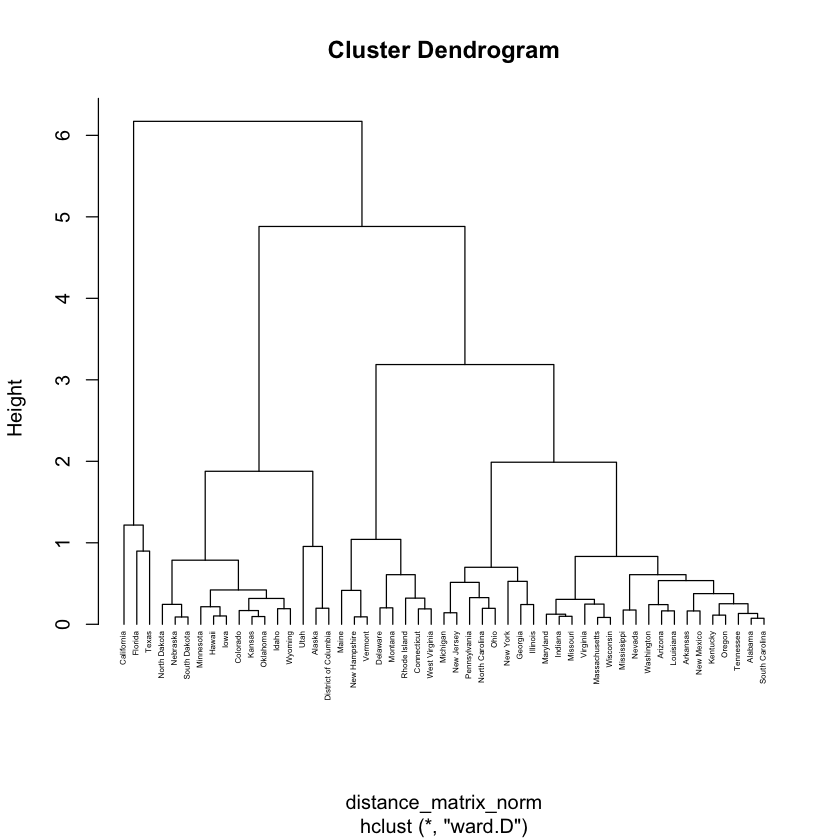

In [31]:
# Let's label the data points with State name
plot(ward, hang = -1, cex = 0.4, labels = data_states$State)

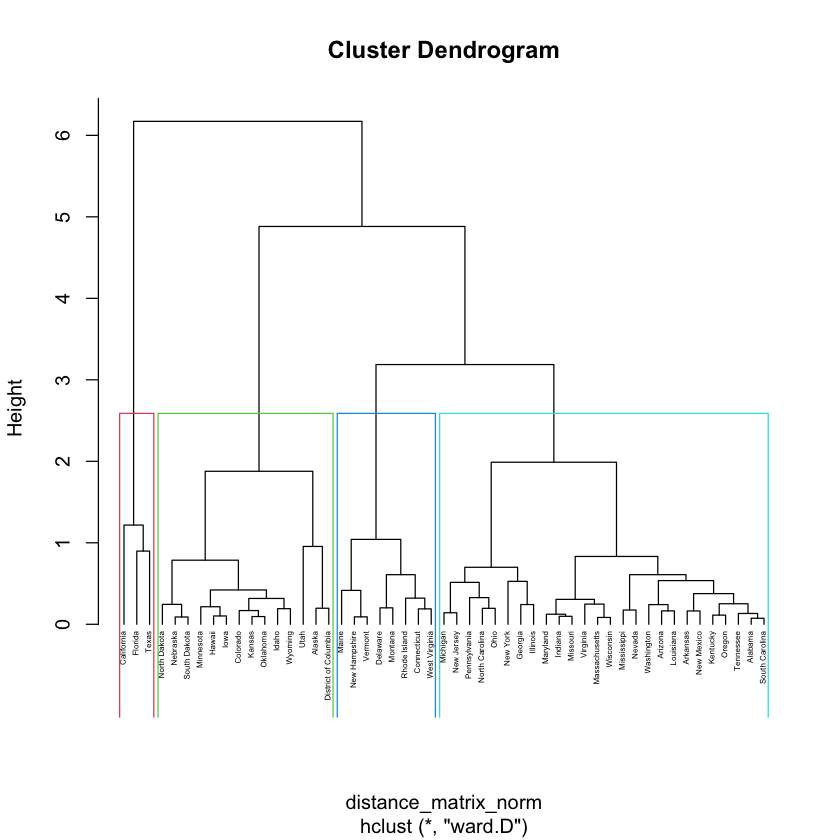

In [32]:
plot(ward, hang = -1, cex = 0.4, labels = data_states$State)
rect.hclust(ward, k = 4, border = 2:5)

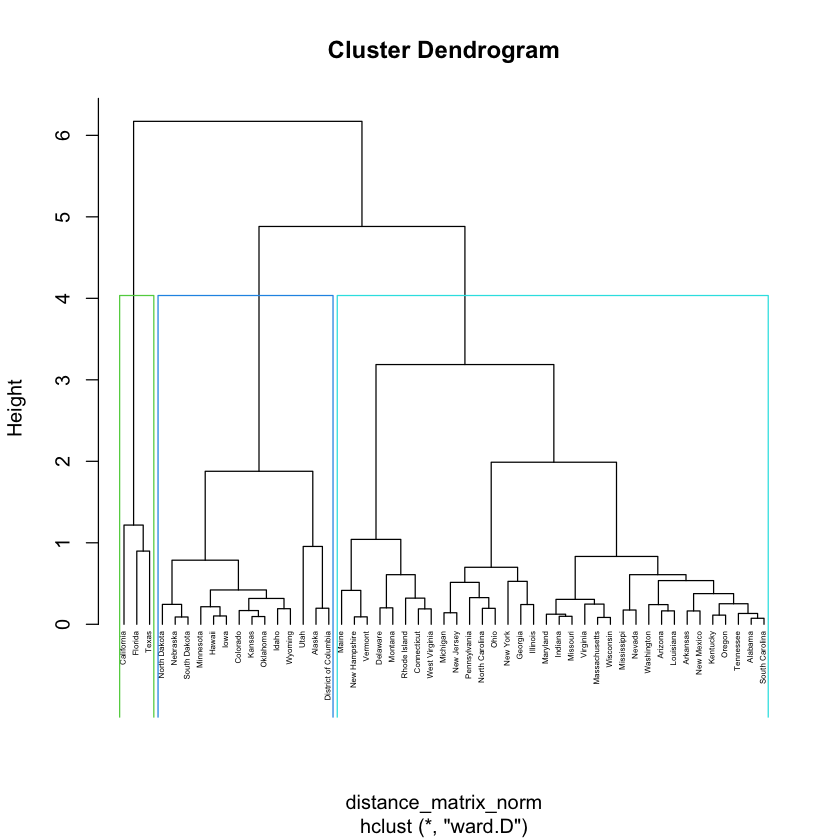

In [33]:
plot(ward, hang = -1, cex = 0.4, labels = data_states$State)
rect.hclust(ward, k = 3, border = 3:5)

In [34]:
hcluster_4 <- cutree(ward, k = 4)

# This will cut the tree using k as a cut-off

In [35]:
hcluster_4

[1] 1 2 1 1 3 2 4 4 2 3 1 2 2 1 1 2 2 1 1 4 1 1 1 2 1 1 4 2 1 4 1 1 1 1 2 1 2 1
[39] 1 4 1 2 1 3 2 4 1 1 4 1 2

In [36]:
table(hcluster_4) # let's take a look at the cluster distribution.

hcluster_4
 1  2  3  4 
26 14  3  8 

In [37]:
data_states$hcluster_4 <- hcluster_4 # let's merge with the original dateset

In [38]:
# what is the summary statistics of cluster 1?

summary(subset(data_states, data_states$hcluster_4 == 1))

    State           Female_Population  Male_Population   Male_MedianAge 
 Length:26          Min.   : 1052690   Min.   :1032882   Min.   :34.80  
 Class :character   1st Qu.: 2402575   1st Qu.:2292803   1st Qu.:36.23  
 Mode  :character   Median : 3352292   Median :3220812   Median :36.75  
                    Mean   : 3714612   Mean   :3566402   Mean   :36.83  
                    3rd Qu.: 4925116   3rd Qu.:4723933   3rd Qu.:37.65  
                    Max.   :10164966   Max.   :9581261   Max.   :39.10  
 Female_MedianAge Unemployment_Rate    Robbery         Burglary    
 Min.   :37.40    Min.   :5.200     Min.   : 2050   Min.   :17230  
 1st Qu.:38.70    1st Qu.:6.000     1st Qu.: 4394   1st Qu.:24462  
 Median :39.75    Median :6.450     Median : 5995   Median :36807  
 Mean   :39.56    Mean   :6.435     Mean   : 7458   Mean   :39109  
 3rd Qu.:40.27    3rd Qu.:6.800     3rd Qu.: 9262   3rd Qu.:46412  
 Max.   :42.30    Max.   :7.900     Max.   :24045   Max.   :79373  
 Larceny.thef

In [39]:
# what is the summary statistics of cluster 2?

summary(subset(data_states, data_states$hcluster_4 == 2))

    State           Female_Population Male_Population   Male_MedianAge 
 Length:14          Min.   : 286111   Min.   : 298042   Min.   :30.00  
 Class :character   1st Qu.: 376313   1st Qu.: 397800   1st Qu.:34.12  
 Mode  :character   Median : 880304   Median : 877680   Median :35.10  
                    Mean   :1148563   Mean   :1148088   Mean   :34.79  
                    3rd Qu.:1538849   3rd Qu.:1527221   3rd Qu.:36.00  
                    Max.   :2745132   Max.   :2712041   Max.   :36.80  
 Female_MedianAge Unemployment_Rate    Robbery          Burglary    
 Min.   :31.00    Min.   :2.700     Min.   : 173.0   Min.   : 2707  
 1st Qu.:36.35    1st Qu.:3.875     1st Qu.: 732.5   1st Qu.: 4206  
 Median :37.50    Median :4.300     Median :1209.5   Median : 8568  
 Mean   :36.81    Mean   :4.543     Mean   :1573.9   Mean   :11358  
 3rd Qu.:37.90    3rd Qu.:4.725     3rd Qu.:2701.5   3rd Qu.:15478  
 Max.   :39.80    Max.   :7.800     Max.   :3687.0   Max.   :29508  
 Larceny.thef

In [40]:
# install.packages("plyr") # install this in Anaconda if this fails
library(plyr)

In [41]:
# Summary statistics, grouped by cluster

ddply(data_states, .(hcluster_4), summarize, F_MedAge=mean(Female_MedianAge), Robbery=mean(Robbery))

hcluster_4,F_MedAge,Robbery
<int>,<dbl>,<dbl>
1,39.56154,7457.923
2,36.81429,1573.929
3,38.53333,34925.000
4,42.73750,840.250


In [42]:
# Where are states in each cluster?

table(data_states$Region, data_states$hcluster_4)

           
             1  2  3  4
  Midwest    6  6  0  0
  Northeast  4  0  0  5
  South     11  2  2  2
  West       5  6  1  1

In [43]:
# Summary statistics grouped by Region (instead of cluster, pay attention to the second argument)

ddply(data_states, .(Region), summarize, F_MedAge=mean(Female_MedianAge), Robbery=mean(Robbery))

Region,F_MedAge,Robbery
<chr>,<dbl>,<dbl>
Midwest,38.90000,5094.833
Northeast,42.27778,6523.556
South,39.15294,7570.765
West,37.58462,6068.077


In [44]:
# Let's convert the numerical cluster to characters (string)

data_states$hcluster_4_str <- toString(data_states$hcluster_4)

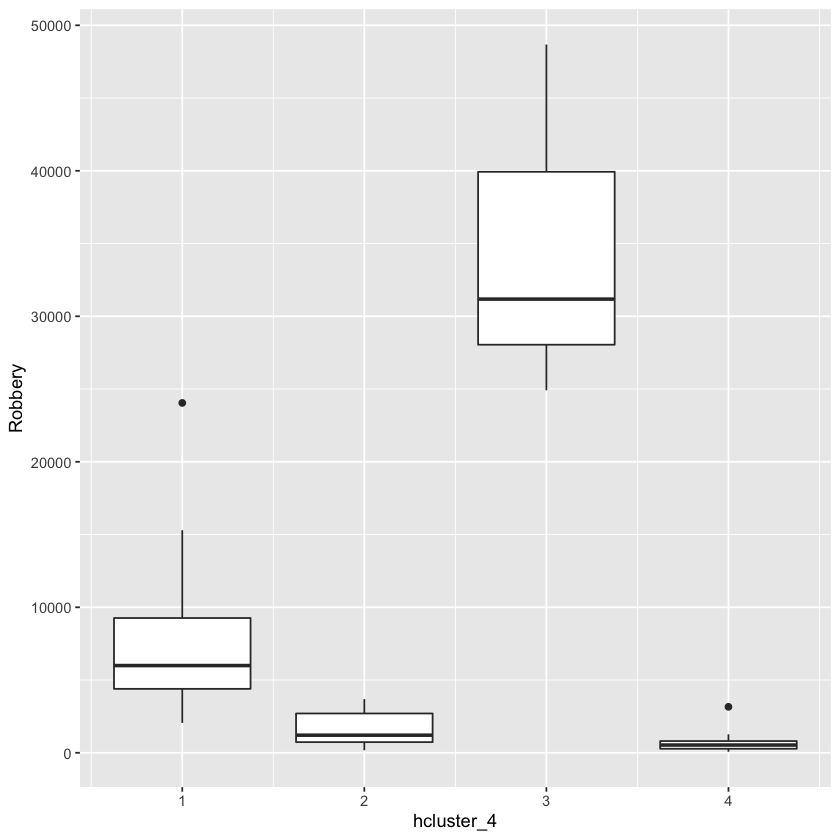

In [45]:
library(ggplot2)
ggplot(data_states, aes(group=hcluster_4, x=hcluster_4, y=Robbery))+ 
    geom_boxplot()

# Average Linkage

We used `method="ward"` here for hierarchical clustering. Can you try other methods? Let's try `average`

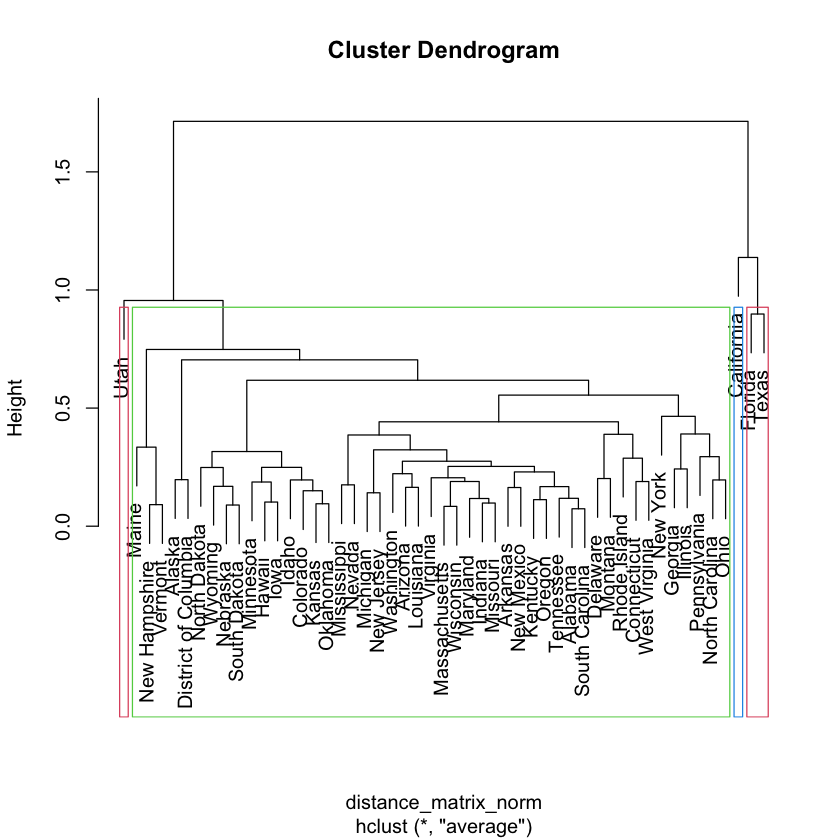

In [46]:
avg = hclust(distance_matrix_norm, method = "average")
plot(avg, labels = data_states$State)
rect.hclust(avg, k = 4, border = 2:4)

In [47]:
avg_4 <- cutree(avg, k = 4)
table(avg_4)
data_states$avg_4 <- avg_4

avg_4
 1  2  3  4 
47  1  2  1 

# K-Means

Next, let us implement k-means, using the function `kmeans()`

We need to input normalized data and we need to specify how many clusters we want. let us say, k=4.

**NOTE**: remember that k-means selects k random points to begin with.

If we want `kmeans` to run for a number of different random starting point, we can use the option `nstart`.

This is to partially address the "poor initialization" problem for k-means.

In the example below, R will try 15 different sets of random starting points 
and then select the one with the lowest within cluster variation.

Since the points are picked at random, every time we run the `kmeans()` the result may vary;

We can use `set.seed()` to fix the "random" number used by `kmeans()`.

In [48]:
set.seed(123) # the number inside is arbitrary

In [49]:
k1 = kmeans(data_norm[, 2:10], centers = 4, nstart = 15)

In [50]:
#Look at a summary of the result
str(k1)

List of 9
 $ cluster     : int [1:51] 4 2 4 4 3 2 1 1 4 3 ...
 $ centers     : num [1:4, 1:9] 0.024 0.048 0.7346 0.1716 0.0223 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:9] "Female_Population" "Male_Population" "Male_MedianAge" "Female_MedianAge" ...
 $ totss       : num 17
 $ withinss    : num [1:4] 0.675 1.136 1.155 2.406
 $ tot.withinss: num 5.37
 $ betweenss   : num 11.6
 $ size        : int [1:4] 8 13 3 27
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [51]:
#check size of each cluster
k1$size

[1]  8 13  3 27

In [52]:
#check cluster centroids
k1$centers

,Female_Population,Male_Population,Male_MedianAge,Female_MedianAge,Unemployment_Rate,Robbery,Burglary,Larceny.theft,Motor.vehicle.theft
1,0.02398831,0.02225711,0.7701923,0.8208042,0.5649038,0.01584551,0.01873293,0.0377206,0.01193241
2,0.04801482,0.04819569,0.3757396,0.4217321,0.3062130,0.02789549,0.04949683,0.0729221,0.03207738
3,0.73463877,0.72884493,0.4692308,0.5268065,0.6923077,0.71703353,0.84568074,0.9349516,0.57707106
4,0.17164572,0.16593073,0.5159544,0.5843046,0.7279202,0.14896569,0.17820682,0.2138498,0.08415432


In [53]:
#Add a column to the original data to indicate in which cluster each observation is
data_states$k_clust <- k1$cluster


In [54]:
#Use the original dataset to do summary statistics like we did before
ddply(data_states, .(k_clust), summarize, F_MedAge=mean(Female_MedianAge), Robbery=mean(Robbery))

k_clust,F_MedAge,Robbery
<int>,<dbl>,<dbl>
1,42.73750,840.250
2,37.03077,1426.000
3,38.53333,34925.000
4,39.35556,7311.222


## K-Means Visualization: Dimension Reduction

Plotting the clusters would be easy if we had 2 or 3 dimensions; in this example, we have *9* dimensions.

What can we do? We can use the package `fviz_cluster`.

If the data contains more than 2 dimensions, the package `fviz_cluster` will perform something called principal component analysis (PCA) and plot the data points according to the first two principal components that explain the majority of the variance.

This is a process called Dimensionality Reduction.

For more information: https://www.youtube.com/watch?v=kw9R0nD69OU

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4



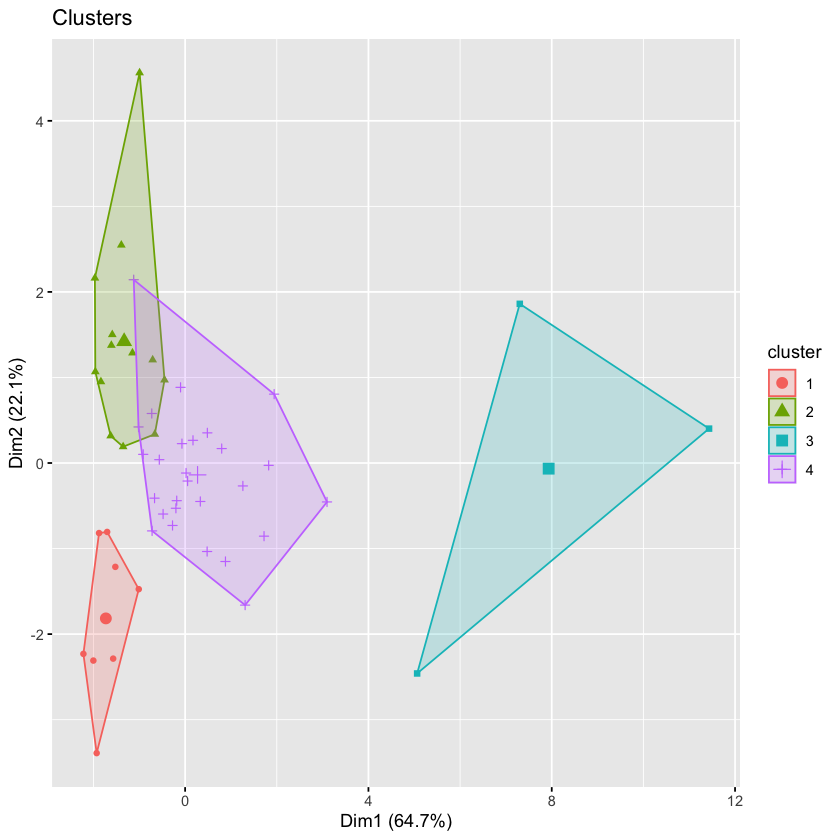

In [55]:
#specify the clustering solution, the data used
fviz_cluster(k1, geom = "point", data = data_norm[, 2:10]) + ggtitle("Clusters")

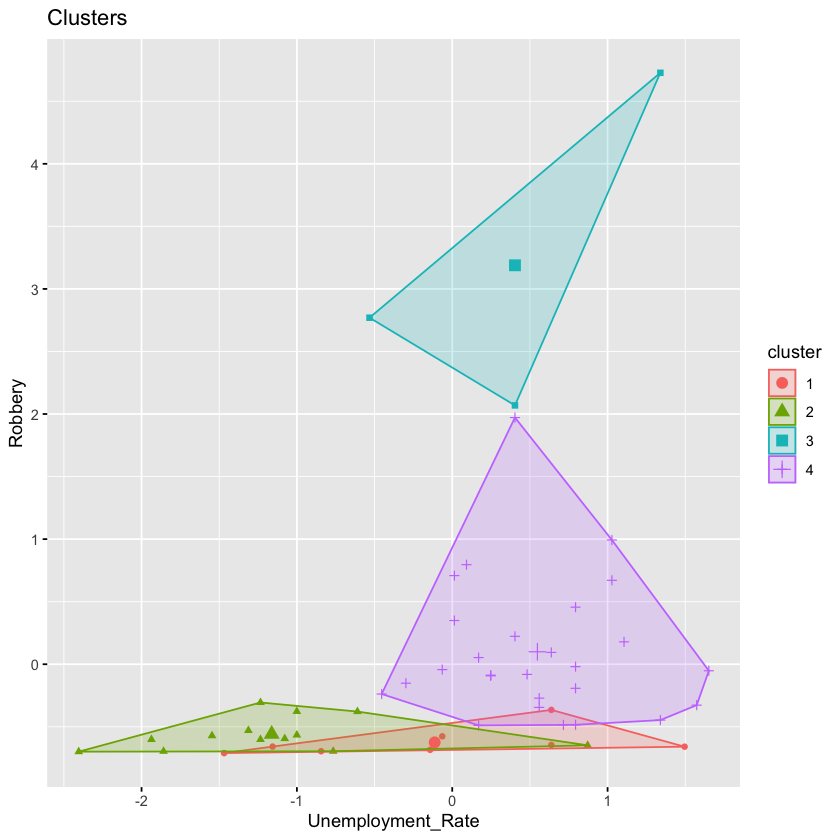

In [56]:
#We could also decide to pick 2 dimensions and plot the clusters for these two
fviz_cluster(k1, geom = "point", data=data_norm[, 2:10], choose.vars = c("Unemployment_Rate", "Robbery")) + 
  ggtitle("Clusters")

While we cannot directly interpret the number of the axis we can interpret the "direction". Example, by looking at the plot, it seems that states in the red cluster tend to have relatively higher values of robbery and higher unemployment rate.

On the other hand, there are the states in the purple and light-green clusters
that seem to have relatively low robbery cases, but the unemployment rate
is distributed across the spectrum.

In [57]:
#We can also run kmeans for different number of k 
#and plot the results in a grid
library(gridExtra)

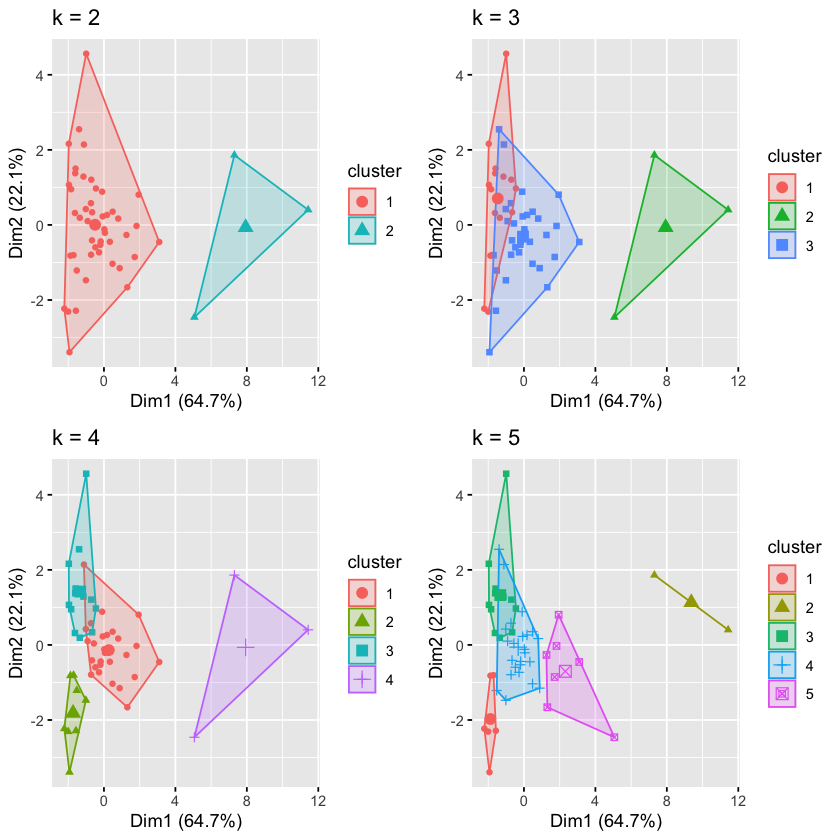

In [58]:
k2 <- kmeans(data_norm[, 2:10], centers = 2, nstart = 15)
k3 <- kmeans(data_norm[, 2:10], centers = 3, nstart = 15)
k4 <- kmeans(data_norm[, 2:10], centers = 4, nstart = 15)
k5 <- kmeans(data_norm[, 2:10], centers = 5, nstart = 15)

p2 <- fviz_cluster(k2, geom = "point", data = data_norm[, 2:10]) + ggtitle("k = 2")
p3 <- fviz_cluster(k3, geom = "point", data = data_norm[, 2:10]) + ggtitle("k = 3")
p4 <- fviz_cluster(k4, geom = "point", data = data_norm[, 2:10]) + ggtitle("k = 4")
p5 <- fviz_cluster(k5, geom = "point", data = data_norm[, 2:10]) + ggtitle("k = 5")

grid.arrange(p2, p3, p4, p5, nrow = 2)

## Evaluating K-means: choosing K

LEt's start by creating a WSS curve

In [59]:
#Let us see how we can compute the WSS and create the Elbow Plot
#Create an empty vector to store the results for the WSS
WSS_curve <- c()

Create a `for`-loop, that implements the k-means clustering for how many times we would like, each time increasing the number of clusters requested during each iteration, we also ask R to compute the WSS and to save the results into `WSS_curve`

In [60]:
#in this example, we run k-means for 10 times (from 1 to 10)
#and with nstart = 5
for (n in 1:10) {
  k <- kmeans(data_norm[,2:10], centers = n, nstart = 5)
  wss <- k$tot.withinss
  WSS_curve[n] <- wss
}

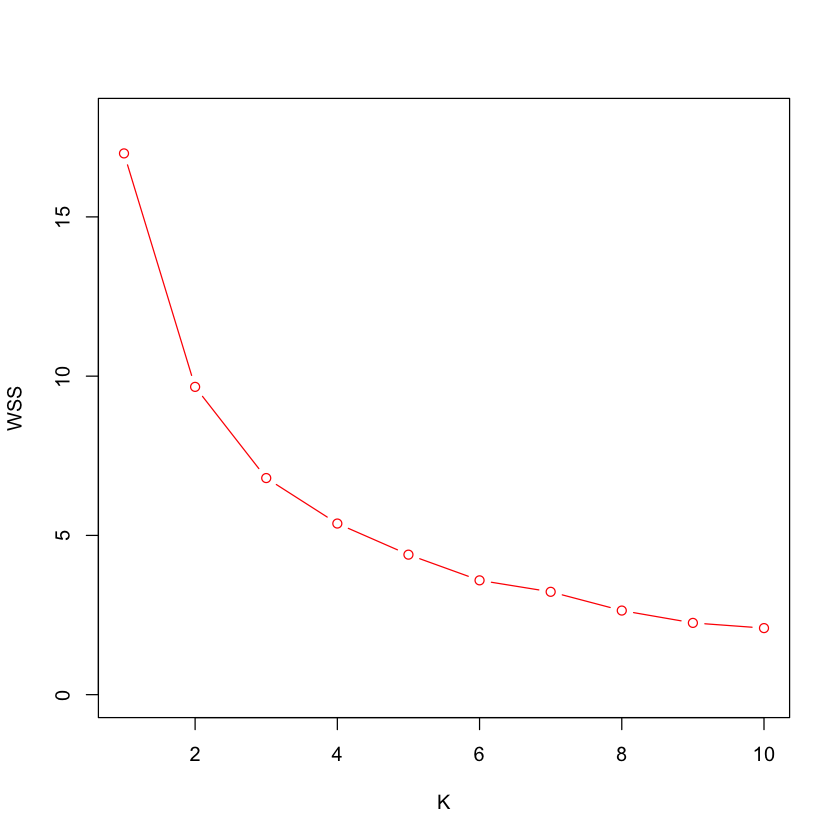

In [61]:
#Plot the final results
plot(1:10, WSS_curve, type = "b", col = "red", ylab = "WSS", xlab = "K", ylim = c(0,18) )

We can also put the WSS and BSS curve together. Starting from scratch here:

In [62]:
WSS_curve <- c()
BSS_curve <- c()

In [63]:
for (n in 1:10) {
  k <- kmeans(data_norm[,2:10], centers = n, nstart = 5)
  wss <- k$tot.withinss
  bss <- k$betweenss
  WSS_curve[n] <- wss
  BSS_curve[n] <- bss
}

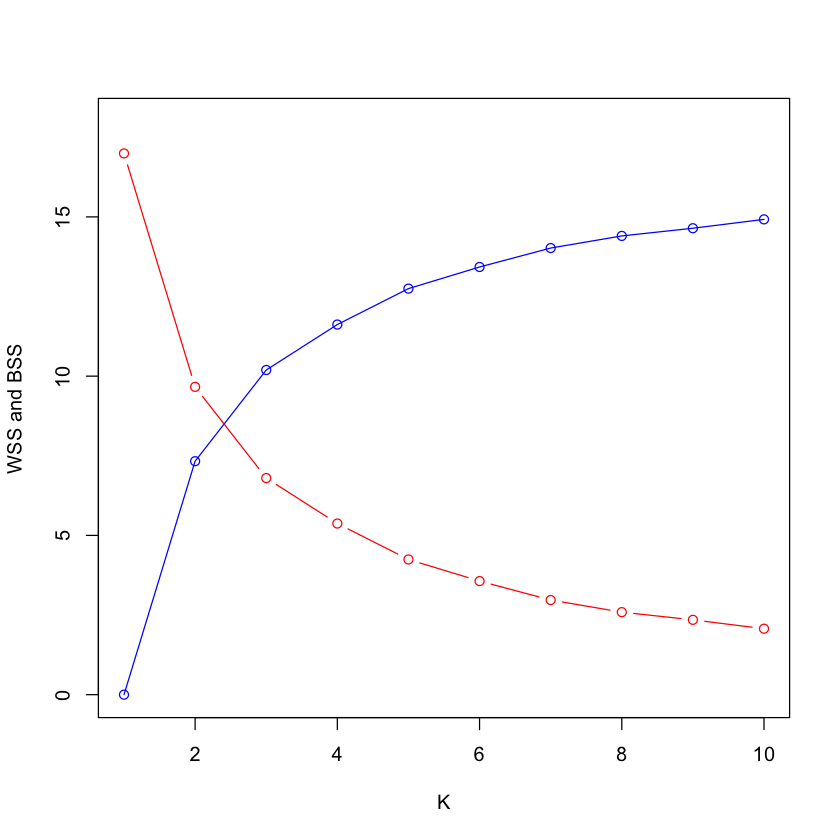

In [64]:
#Finally, we can plot both in the same graph
plot(1:10, WSS_curve, type = "b", col = "red", ylab = "WSS and BSS", xlab = "K", ylim = c(0,18)  ) 
lines(1:10, BSS_curve,type="o",col="blue")